In [1]:
from collections import defaultdict
import os
import pandas as pd
import numpy as np

#SK Learn Packages
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score


from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

#Misc Stats Packages
import statsmodels.api as sm

#VIF Analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

#Forward and Backwards selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

#Ploting Packages
import matplotlib.pyplot as plt
from colour import Color

import warnings
warnings.filterwarnings("ignore")

# set your working directory to "Team-51" 
path = "D:\\2022\\Team-51"
jc_path = r"C:\Users\JCascioli\Desktop\Georgia_Tech\Semester 7 - MGT 6203 - Data Analytics in Business\Project\Team-51"
#os.chdir(path)
os.chdir(path)

os.getcwd()

'D:\\2022\\Team-51'

In [2]:
# if we want to switch from showing all rows vs the default view

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# pd.reset_option('display.max_columns', None)
# pd.reset_option('display.max_rows', None)

## Data Preparation


#### Load final dataset

In [3]:
df_final = pd.read_csv("Data\\final_data_clean.csv")
df_final = df_final[list(df_final.columns[1:])]    # need to change to 3 for final dataset

# shape
df_final.shape

(1414, 30)

In [4]:
df_final.head()

,communityName,state,householsize,agePct12t29,agePct65up,pctWSocSec,pctWPubAsst,PctUsePubTrans,PctPopUnderPov,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,PersPerFam,PctFam2Par,PctWorkMom,PctKidsBornNeverMar,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,LemasPctOfficDrugUn,ViolentCrimesPerPop,has_pp_access,PctFedEduFunding,PctStateEduFunding
0,Aberdeen,NJ,2.89,26.94,7.59,19.87,2.93,12.82,3.18,17.15,28.03,5.16,14.72,23.10,11.25,35.52,3.27,83.88,68.56,1.76,0.015553,95.71,80.47,6.42,44.91,0.0,0.29732,0,4.633333,48.823333
1,Ada,OK,2.37,30.44,17.77,36.76,10.01,0.19,22.93,29.43,23.32,8.39,13.74,32.69,14.14,28.24,2.88,66.19,69.18,1.43,0.058850,87.75,56.21,3.97,41.14,0.0,0.53285,0,12.010000,63.510000
2,Agoura Hills,CA,3.08,24.89,3.61,10.53,1.58,0.62,3.53,7.13,44.15,3.61,11.71,23.43,4.40,44.57,3.37,86.68,65.20,0.54,0.015547,95.42,83.40,0.63,15.77,0.0,0.36876,0,1.110000,42.940000
3,Aiken,SC,2.56,23.43,14.62,30.95,8.48,0.00,15.69,20.62,33.06,4.96,24.96,23.75,12.07,38.22,3.05,70.11,68.55,4.59,0.039956,90.71,66.18,3.02,37.78,0.0,0.50420,0,7.870000,58.270000
4,Alabaster,AL,2.99,27.21,6.64,15.10,3.72,0.14,5.65,22.15,24.38,2.83,12.66,21.95,11.31,30.14,3.23,83.95,68.02,1.08,0.015137,95.66,82.71,0.00,21.97,0.0,0.13794,0,5.100000,57.450000


#### Drop regional data (community, state, population)

In [5]:
# select numerical variables
df_selected = df_final[list(df_final.columns[2:])]    # need to change to 3 for final dataset
# df_selected.shape
df_selected.shape

(1414, 28)

In [6]:
df_selected.head()

,householsize,agePct12t29,agePct65up,pctWSocSec,pctWPubAsst,PctUsePubTrans,PctPopUnderPov,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,PersPerFam,PctFam2Par,PctWorkMom,PctKidsBornNeverMar,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,LemasPctOfficDrugUn,ViolentCrimesPerPop,has_pp_access,PctFedEduFunding,PctStateEduFunding
0,2.89,26.94,7.59,19.87,2.93,12.82,3.18,17.15,28.03,5.16,14.72,23.10,11.25,35.52,3.27,83.88,68.56,1.76,0.015553,95.71,80.47,6.42,44.91,0.0,0.29732,0,4.633333,48.823333
1,2.37,30.44,17.77,36.76,10.01,0.19,22.93,29.43,23.32,8.39,13.74,32.69,14.14,28.24,2.88,66.19,69.18,1.43,0.058850,87.75,56.21,3.97,41.14,0.0,0.53285,0,12.010000,63.510000
2,3.08,24.89,3.61,10.53,1.58,0.62,3.53,7.13,44.15,3.61,11.71,23.43,4.40,44.57,3.37,86.68,65.20,0.54,0.015547,95.42,83.40,0.63,15.77,0.0,0.36876,0,1.110000,42.940000
3,2.56,23.43,14.62,30.95,8.48,0.00,15.69,20.62,33.06,4.96,24.96,23.75,12.07,38.22,3.05,70.11,68.55,4.59,0.039956,90.71,66.18,3.02,37.78,0.0,0.50420,0,7.870000,58.270000
4,2.99,27.21,6.64,15.10,3.72,0.14,5.65,22.15,24.38,2.83,12.66,21.95,11.31,30.14,3.23,83.95,68.02,1.08,0.015137,95.66,82.71,0.00,21.97,0.0,0.13794,0,5.100000,57.450000


(Regional information retrieved by index)

## Preview

Dependent variable and independent variables


In [7]:
y_col = 'ViolentCrimesPerPop'
x_cols = [c for c in df_selected.columns if c != y_col]

# print(x_cols)
# print(len(x_cols))


## Split data

#### X and y

In [8]:
# X
X = df_selected[x_cols]
# print(X.shape)

# y
y = df_selected[y_col]

# preview X, y
# X.head()
# y.head()

#### train & test set

In [9]:
# train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
X_train.head()

,householsize,agePct12t29,agePct65up,pctWSocSec,pctWPubAsst,PctUsePubTrans,PctPopUnderPov,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,PersPerFam,PctFam2Par,PctWorkMom,PctKidsBornNeverMar,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,LemasPctOfficDrugUn,has_pp_access,PctFedEduFunding,PctStateEduFunding
213,2.45,26.70,13.57,29.87,9.76,3.06,18.18,31.04,18.24,6.90,18.02,23.37,17.19,24.71,2.99,59.57,66.87,7.21,0.048693,89.33,54.23,4.30,34.47,0.000046,0,9.160769,37.513846
996,2.25,21.07,22.29,40.34,5.48,3.53,16.05,26.27,18.38,6.34,8.53,19.79,11.55,24.81,2.79,55.82,70.64,8.12,0.145862,75.28,63.26,1.08,27.40,0.000174,0,5.660000,50.820000
60,2.55,25.93,13.12,28.72,8.12,0.58,10.91,23.27,19.08,6.69,22.48,26.65,16.71,25.48,3.01,71.75,72.69,3.01,0.035337,91.75,56.97,1.75,42.49,0.000000,0,4.028571,51.364286
1392,2.42,28.40,13.71,27.67,5.73,0.65,11.30,31.17,18.78,4.77,20.42,21.05,18.38,25.43,2.94,70.69,79.17,3.90,0.032989,92.62,45.38,2.35,22.79,0.000000,0,4.050000,32.313333
955,3.12,29.09,5.90,16.34,6.85,1.11,7.05,23.51,8.91,5.50,12.15,27.29,15.76,18.82,3.42,75.51,71.68,3.71,0.015123,95.50,73.04,13.92,40.08,0.000000,0,5.960000,68.890000


In [10]:
y_train.head()

213     1.96067
996     2.68228
60      0.07271
1392    0.71146
955     0.37716
Name: ViolentCrimesPerPop, dtype: float64

## VIF Analysis

Resources:
https://towardsdatascience.com/targeting-multicollinearity-with-python-3bd3b4088d0b


In [11]:
def compute_vif(considered_features,data_frame):
    
    X_vif = data_frame[considered_features]
    # the calculation of variance inflation requires a constant
    X_vif['intercept'] = 1
    
    # create dataframe to store vif values
    vif = pd.DataFrame()
    vif["Variable"] = X_vif.columns
    vif["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif

In [12]:
#Analyze all features
considered_features = list(X.columns)
print(considered_features)
len(considered_features)

['householsize', 'agePct12t29', 'agePct65up', 'pctWSocSec', 'pctWPubAsst', 'PctUsePubTrans', 'PctPopUnderPov', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'PersPerFam', 'PctFam2Par', 'PctWorkMom', 'PctKidsBornNeverMar', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos', 'LemasPctOfficDrugUn', 'has_pp_access', 'PctFedEduFunding', 'PctStateEduFunding']


27

In [13]:
# compute vif 
compute_vif(considered_features,data_frame=X).sort_values('VIF', ascending=False)

,Variable,VIF
13,PctOccupMgmtProf,21.082320
3,pctWSocSec,20.899828
2,agePct65up,20.450051
8,PctBSorMore,17.432287
15,PctFam2Par,14.615311
12,PctOccupManu,10.461775
19,PctHousOccup,10.413665
18,HousVacant,9.068545
14,PersPerFam,8.720318
6,PctPopUnderPov,8.699885


## Linear Regression


#### Fit model - for whole X

In [14]:
# add constant
X_train_sm = sm.add_constant(X_train)
# fit model
m_linear = sm.OLS(y_train, X_train_sm).fit()

# model summary
print(m_linear.summary())


                             OLS Regression Results                            
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.616
Model:                             OLS   Adj. R-squared:                  0.605
Method:                  Least Squares   F-statistic:                     56.98
Date:                 Mon, 14 Nov 2022   Prob (F-statistic):          1.84e-178
Time:                         13:32:13   Log-Likelihood:                -477.06
No. Observations:                  989   AIC:                             1010.
Df Residuals:                      961   BIC:                             1147.
Df Model:                           27                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   

#### Record model metrics (Linear Regression - Training)

In [15]:
model_1 = pd.DataFrame({"Model": ["Linear Regression - Training model"], 
                        "Features": ["(all)"],
                        "R-squared": [0.616], 
                        "Adj. R-squared": [0.605], 
                        "AIC": [1010.0], 
                        "Conditional No.": [2.97e+06]})
records = pd.DataFrame(model_1)
records

,Model,Features,R-squared,Adj. R-squared,AIC,Conditional No.
0,Linear Regression - Training model,(all),0.616,0.605,1010.0,2970000.0


#### Variables with p-value < 0.05

Output table is sorted by p value in ascending order.

In [16]:
# set threshold
thrd = 0.05

# Get indices of variables with p-value < 0.05
ids = [p for p in range(len(m_linear.pvalues)) if m_linear.pvalues[p] < thrd]
# pd.DataFrame([m_linear.pvalues[ids], m_linear.params[ids]], columns=["p-value"])
df = pd.read_html(m_linear.summary().tables[1].as_html(), header=0)[0]
df.rename(columns={df.columns[0]: "significant factors (95% CI)"}, inplace=True)
df = df.iloc[ids]


# sorted_df = df.sort_values(by="P>|t|")
# # display(sorted_df)
p = np.array(m_linear.pvalues[ids])
df["p value"] = p

df = df.drop(columns=["P>|t|"], axis=1)
sorted_df = df.sort_values(by="p value")
# drop intercept
sorted_df = sorted_df.drop(labels=[0], axis=0)
display(sorted_df)


,significant factors (95% CI),coef,std err,t,[0.025,0.975],p value
18,PctKidsBornNeverMar,0.0814,0.011,7.323,0.060,0.103000,5.116552e-13
16,PctFam2Par,-0.0232,0.005,-4.778,-0.033,-0.014000,2.049975e-06
22,PctVacantBoarded,0.0194,0.005,3.825,0.009,0.029000,1.391442e-04
17,PctWorkMom,-0.0094,0.003,-3.486,-0.015,-0.004000,5.117158e-04
23,PctVacMore6Mos,-0.0040,0.001,-3.111,-0.006,-0.001000,1.917065e-03
27,PctStateEduFunding,0.0024,0.001,2.360,0.000,0.004000,1.847599e-02
26,PctFedEduFunding,0.0126,0.006,2.222,0.001,0.024000,2.653752e-02
12,PctEmplProfServ,-0.0081,0.004,-1.996,-0.016,-0.000000,4.620440e-02
11,PctEmplManu,-0.0060,0.003,-1.985,-0.012,-0.000069,4.740639e-02


#### Scatterplots

In highlighted(orange) scatter plots are variables our linear regression model has found to be significant. 

The darker the color, the more significant the variable.

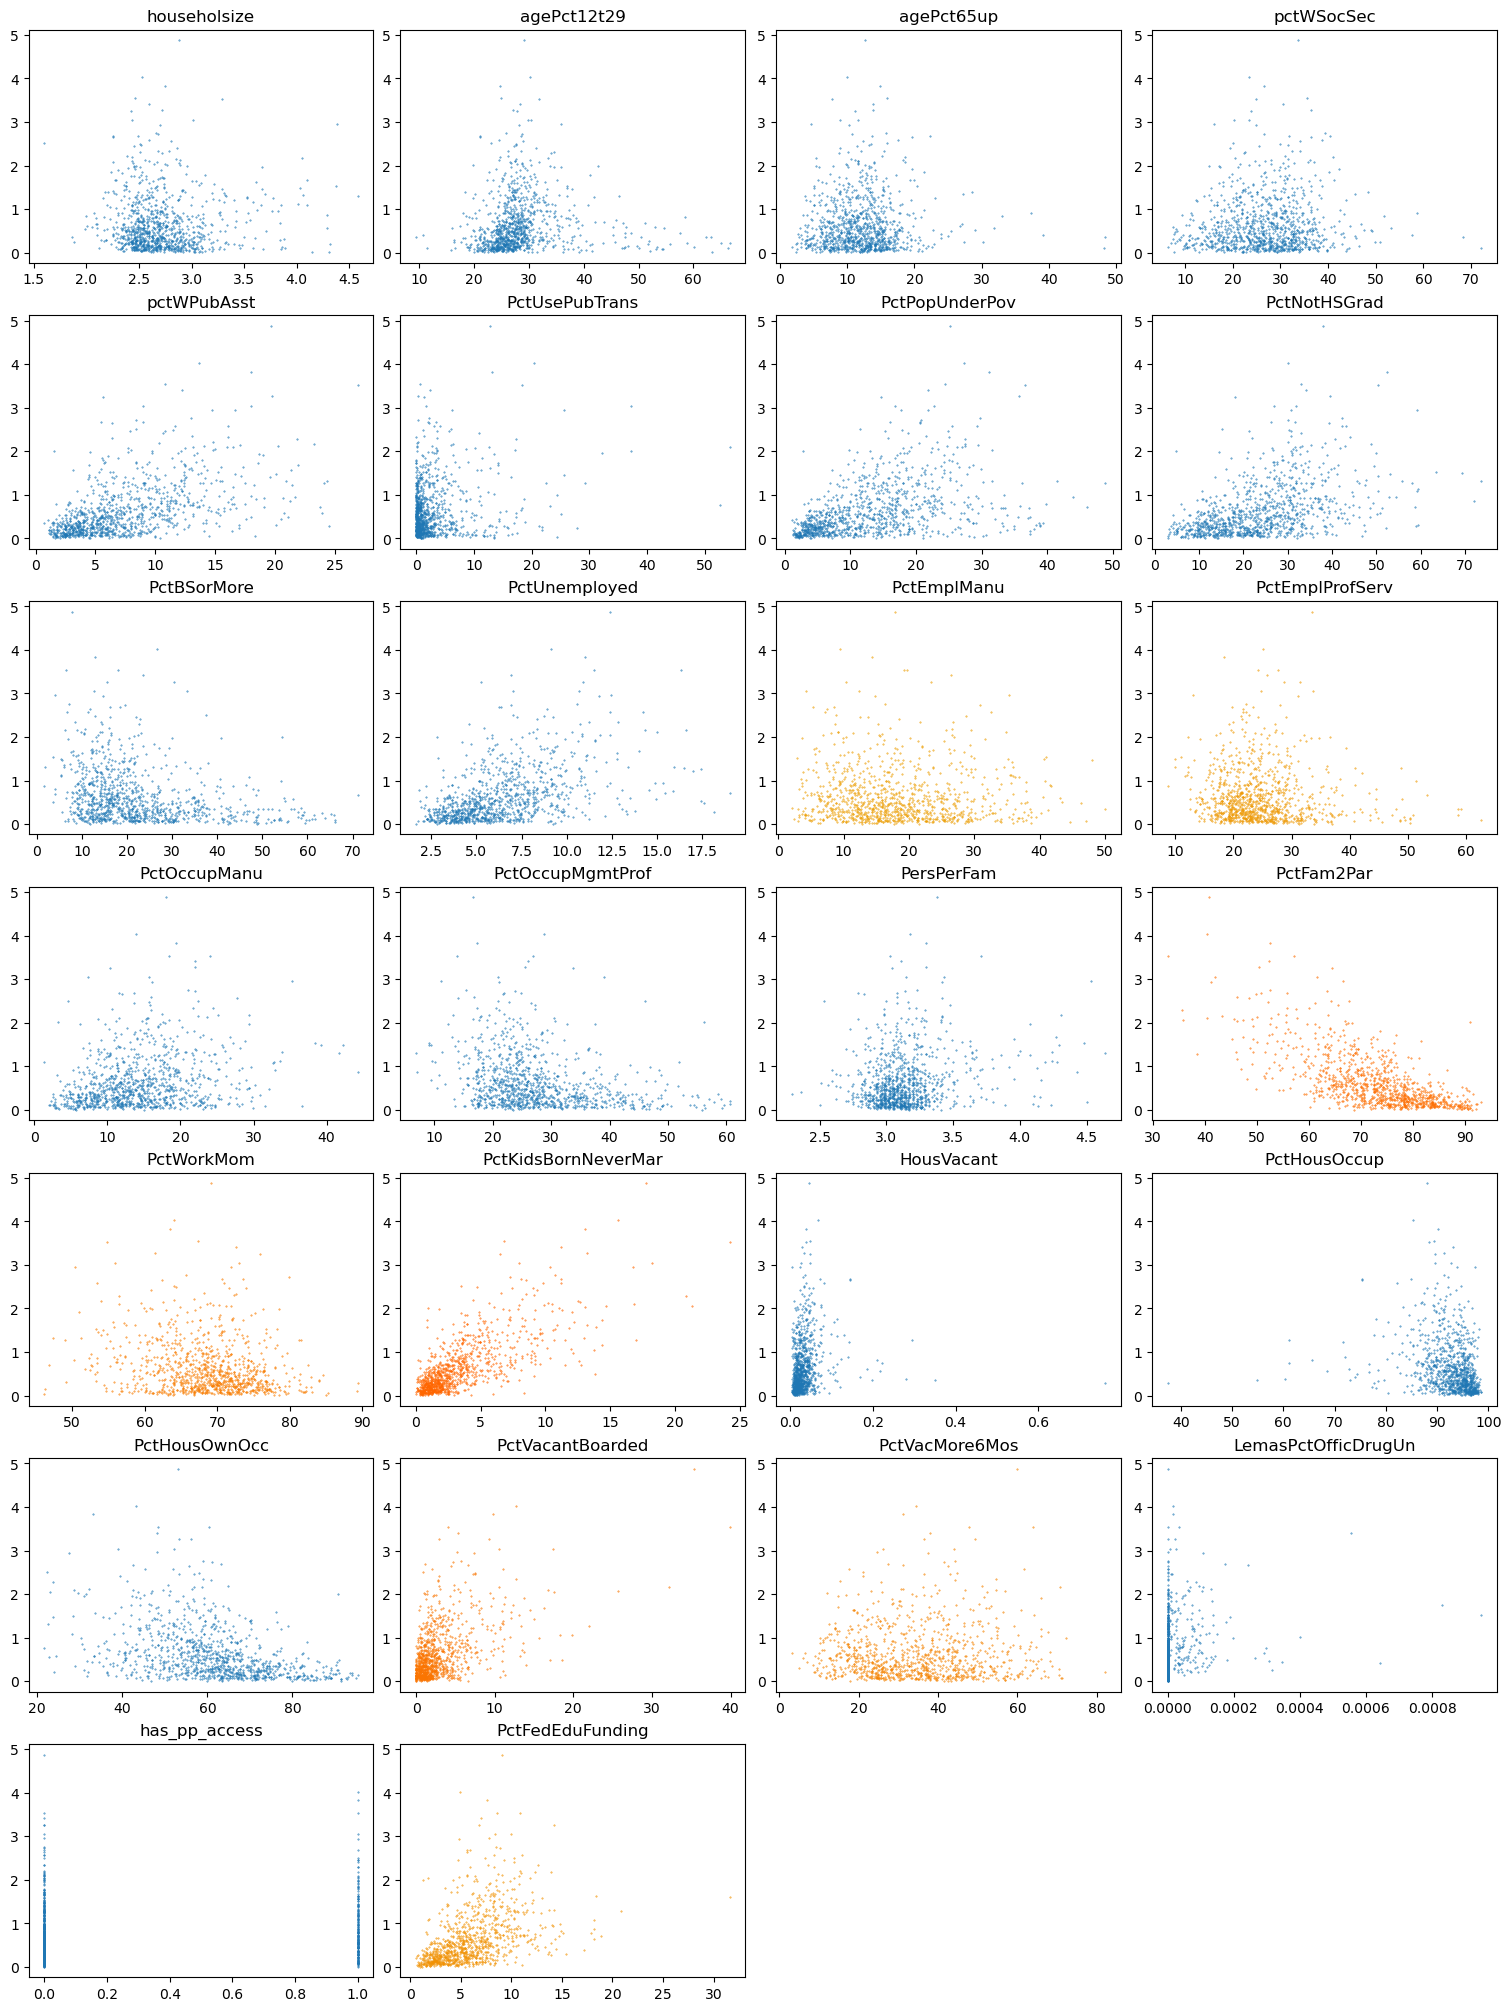

In [17]:
# significant variables
sorting = list(sorted_df["significant factors (95% CI)"])
oranges = list(Color("#ff6600").range_to(Color("#ec9f05"), len(sorting)))

fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(15, 20), constrained_layout=True)

fig.delaxes(axes[6][2])
fig.delaxes(axes[6][3])

for ax, col in zip(axes.flat, X_train):
    ax.set_title(col)
    if col in sorting:
        i = sorting.index(col)
        ax.scatter(x=X_train[col], y=y_train, s=0.15, color=oranges[i].hex)
    else:
        ax.scatter(x=X_train[col], y=y_train, s=0.15)

#### Test linear regression model

In [18]:
X_linear_chosen = list(sorted_df["significant factors (95% CI)"])

# add constant
X_test_sm = sm.add_constant(X_test[X_linear_chosen])
# fit model
m_linear_test = sm.OLS(y_test, X_test_sm).fit()

# model summary
print(m_linear_test.summary())


                             OLS Regression Results                            
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.618
Model:                             OLS   Adj. R-squared:                  0.610
Method:                  Least Squares   F-statistic:                     74.73
Date:                 Mon, 14 Nov 2022   Prob (F-statistic):           3.25e-81
Time:                         13:32:16   Log-Likelihood:                -204.99
No. Observations:                  425   AIC:                             430.0
Df Residuals:                      415   BIC:                             470.5
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   

#### Record model metrics (Linear Regression - Test)

In [19]:
model_2 = pd.DataFrame({"Model": ["Linear Regression - Test model"], 
                        "Features": [str(X_linear_chosen)],
                        "R-squared": [0.618], 
                        "Adj. R-squared": [0.610], 
                        "AIC": [430.0], 
                        "Conditional No.": [2.78e+03]})
records = pd.concat([records, model_2], ignore_index=True)
records

,Model,Features,R-squared,Adj. R-squared,AIC,Conditional No.
0,Linear Regression - Training model,(all),0.616,0.605,1010.0,2970000.0
1,Linear Regression - Test model,"['PctKidsBornNeverMar', 'PctFam2Par', 'PctVaca...",0.618,0.610,430.0,2780.0


************

## Sequential Feature Selection

Similar to forward feature selection

In [20]:
estimator = LinearRegression()

selector = sfs(estimator, k_features=15, forward=True, floating=False, verbose=2, scoring="neg_mean_squared_error", cv=10)
selector = selector.fit(X_train, y_train)

# metrics
selector.get_metric_dict()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.3s finished

[2022-11-14 13:32:17] Features: 1/15 -- score: -0.18895055186374646[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.3s finished

[2022-11-14 13:32:17] Features: 2/15 -- score: -0.18355834360100606[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished

[2022-11-14 13:32:17] Features: 3/15 -- score: -0.1790745280731127[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: D

{1: {'feature_idx': (17,),
  'cv_scores': array([-0.1848946 , -0.20384898, -0.20684052, -0.16374918, -0.1783061 ,
         -0.18529665, -0.15969511, -0.1687985 , -0.19476758, -0.24330829]),
  'avg_score': -0.18895055186374646,
  'feature_names': ('PctKidsBornNeverMar',),
  'ci_bound': 0.01752994142104659,
  'std_dev': 0.023602579442821597,
  'std_err': 0.007867526480940532},
 2: {'feature_idx': (17, 25),
  'cv_scores': array([-0.18763775, -0.19735751, -0.19821577, -0.16203493, -0.15733239,
         -0.18831325, -0.15306783, -0.16064359, -0.19461217, -0.23636824]),
  'avg_score': -0.18355834360100606,
  'feature_names': ('PctKidsBornNeverMar', 'PctFedEduFunding'),
  'ci_bound': 0.01813405733056907,
  'std_dev': 0.024415970281085192,
  'std_err': 0.00813865676036173},
 3: {'feature_idx': (1, 17, 25),
  'cv_scores': array([-0.1782566 , -0.19497182, -0.19623895, -0.15023504, -0.15225603,
         -0.17693828, -0.14736621, -0.15823423, -0.20332448, -0.23292363]),
  'avg_score': -0.179074528

#### Plot performance metrics

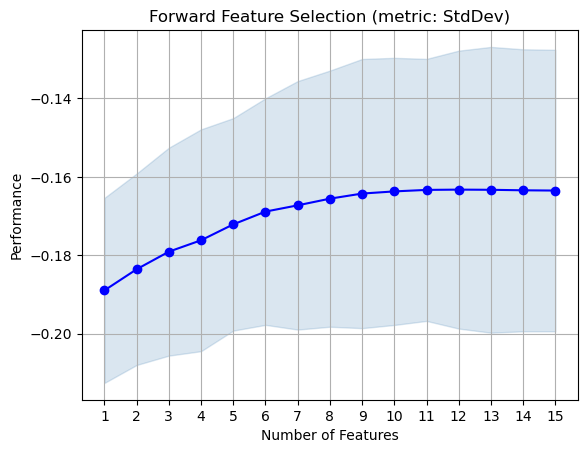

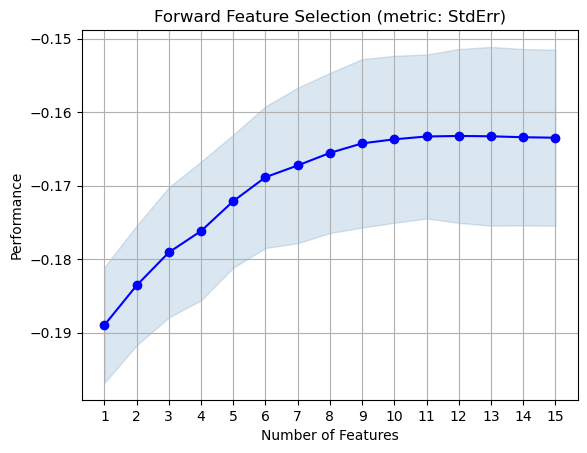

In [21]:
fig = plot_sfs(selector.get_metric_dict(), kind="std_dev")

plt.title("Forward Feature Selection (metric: StdDev)")
plt.grid()
# plt.show()

fig = plot_sfs(selector.get_metric_dict(), kind="std_err")

plt.title("Forward Feature Selection (metric: StdErr)")
plt.grid()
plt.show()



After 9th feature, the model shows less improvement

#### Top 9 significant features

In [22]:
forward_chosen = list(selector.k_feature_idx_)[:9]
# print(chosen)
print(list(X_train.columns[forward_chosen]))

['agePct12t29', 'pctWSocSec', 'pctWPubAsst', 'PctUsePubTrans', 'PctBSorMore', 'PersPerFam', 'PctFam2Par', 'PctWorkMom', 'PctKidsBornNeverMar']


#### Train results on linear regression

In [23]:
X_forward_chosen = list(X_train.columns[forward_chosen])
# add constant
X_train_sm = sm.add_constant(X_train[X_forward_chosen])
# fit model
m_linear = sm.OLS(y_train, X_train_sm).fit()

# model summary
print(m_linear.summary())


                             OLS Regression Results                            
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.586
Model:                             OLS   Adj. R-squared:                  0.582
Method:                  Least Squares   F-statistic:                     154.0
Date:                 Mon, 14 Nov 2022   Prob (F-statistic):          1.14e-180
Time:                         13:32:20   Log-Likelihood:                -513.62
No. Observations:                  989   AIC:                             1047.
Df Residuals:                      979   BIC:                             1096.
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   

#### Record model metrics (Forward Selection - Training)

In [24]:
model_3 = pd.DataFrame({"Model": ["Forward Selection - Training model"], 
                        "Features": [X_forward_chosen],
                        "R-squared": [0.586], 
                        "Adj. R-squared": [0.582], 
                        "AIC": [1047.], 
                        "Conditional No.": [3.57e+03]})
records = pd.concat([records, model_3], ignore_index=True)
records

,Model,Features,R-squared,Adj. R-squared,AIC,Conditional No.
0,Linear Regression - Training model,(all),0.616,0.605,1010.0,2970000.0
1,Linear Regression - Test model,"['PctKidsBornNeverMar', 'PctFam2Par', 'PctVaca...",0.618,0.610,430.0,2780.0
2,Forward Selection - Training model,"[agePct12t29, pctWSocSec, pctWPubAsst, PctUseP...",0.586,0.582,1047.0,3570.0


#### Filter p-value < 0.05

In [25]:
# set threshold
thrd = 0.05

# Get indices of variables with p-value < 0.05
ids = [p for p in range(len(m_linear.pvalues)) if m_linear.pvalues[p] < thrd]
# pd.DataFrame([m_linear.pvalues[ids], m_linear.params[ids]], columns=["p-value"])
df = pd.read_html(m_linear.summary().tables[1].as_html(), header=0)[0]
df.rename(columns={df.columns[0]: "significant factors (95% CI)"}, inplace=True)
df = df.iloc[ids]


# sorted_df = df.sort_values(by="P>|t|")
# # display(sorted_df)
p = np.array(m_linear.pvalues[ids])
df["p value"] = p

df = df.drop(columns=["P>|t|"], axis=1)
sorted_df = df.sort_values(by="p value")
# drop intercept
sorted_df = sorted_df.drop(labels=[0], axis=0)
display(sorted_df)

,significant factors (95% CI),coef,std err,t,[0.025,0.975],p value
9,PctKidsBornNeverMar,0.0840,0.010,7.999,0.063,0.105,3.526293e-15
7,PctFam2Par,-0.0300,0.004,-7.243,-0.038,-0.022,8.882603e-13
1,agePct12t29,-0.0162,0.002,-6.784,-0.021,-0.012,2.021200e-11
8,PctWorkMom,-0.0134,0.003,-5.245,-0.018,-0.008,1.915033e-07
2,pctWSocSec,-0.0079,0.002,-3.340,-0.013,-0.003,8.695494e-04
6,PersPerFam,0.2799,0.094,2.973,0.095,0.465,3.021304e-03
3,pctWPubAsst,-0.0167,0.006,-2.774,-0.029,-0.005,5.650246e-03
4,PctUsePubTrans,-0.0065,0.003,-2.214,-0.012,-0.001,2.707447e-02


#### Test model (Forward Selection + Linear Regression filter)

In [26]:
X_forward_chosen = list(sorted_df["significant factors (95% CI)"])

# add constant
X_test_sm = sm.add_constant(X_test[X_forward_chosen])
# fit model
m_linear_test = sm.OLS(y_test, X_test_sm).fit()

# model summary
print(m_linear_test.summary())


                             OLS Regression Results                            
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.609
Model:                             OLS   Adj. R-squared:                  0.601
Method:                  Least Squares   F-statistic:                     80.85
Date:                 Mon, 14 Nov 2022   Prob (F-statistic):           6.54e-80
Time:                         13:32:21   Log-Likelihood:                -210.41
No. Observations:                  425   AIC:                             438.8
Df Residuals:                      416   BIC:                             475.3
Df Model:                            8                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   

#### Record model metrics (Forward Selection - Test)

In [27]:
model_4 = pd.DataFrame({"Model": ["Forward Selection - Test model"], 
                        "Features": [X_forward_chosen],
                        "R-squared": [0.609], 
                        "Adj. R-squared": [0.601], 
                        "AIC": [438.8], 
                        "Conditional No.": [3.28e+03]})
records = pd.concat([records, model_4], ignore_index=True)
records

,Model,Features,R-squared,Adj. R-squared,AIC,Conditional No.
0,Linear Regression - Training model,(all),0.616,0.605,1010.0,2970000.0
1,Linear Regression - Test model,"['PctKidsBornNeverMar', 'PctFam2Par', 'PctVaca...",0.618,0.610,430.0,2780.0
2,Forward Selection - Training model,"[agePct12t29, pctWSocSec, pctWPubAsst, PctUseP...",0.586,0.582,1047.0,3570.0
3,Forward Selection - Test model,"[PctKidsBornNeverMar, PctFam2Par, agePct12t29,...",0.609,0.601,438.8,3280.0


## Recursive Feature Elimination

Similar to backward feature elimination

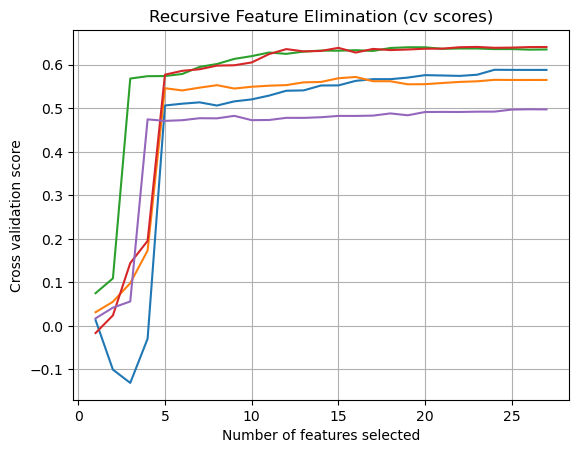

In [28]:
# x, y for rfe
# x_rfe = X_train
# y_rfe = y_train
names = pd.DataFrame(X_train.columns)

estimator = LinearRegression()

selector = RFECV(estimator, step=1, cv=5)
# selector = selector.fit(x_rfe, y_rfe)
# selector.support_
# selector.ranking_

selector.fit(X_train, y_train)
selector.grid_scores_

n = len(list(selector.ranking_)) + 1
plt.plot(range(1, n), selector.grid_scores_)
plt.title("Recursive Feature Elimination (cv scores)")
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.grid()
plt.show()


#### Top 12 features

In [29]:
rankings = pd.DataFrame(selector.ranking_)
# rankings.head()

rankings = pd.concat([names, rankings], axis=1)
rankings.columns = ["Feature", "Rank"]

rankings = rankings.sort_values(by="Rank")
rankings.head(12)


,Feature,Rank
0,householsize,1
24,has_pp_access,1
23,LemasPctOfficDrugUn,1
22,PctVacMore6Mos,1
21,PctVacantBoarded,1
20,PctHousOwnOcc,1
19,PctHousOccup,1
18,HousVacant,1
17,PctKidsBornNeverMar,1
16,PctWorkMom,1


#### Train backward elimination results on linear regression

In [30]:
X_backward_chosen = list(rankings["Feature"])[:12]

# add constant
X_train_sm = sm.add_constant(X_train[X_backward_chosen])
# fit model
m_linear = sm.OLS(y_train, X_train_sm).fit()

# model summary
print(m_linear.summary())
# print(m_linear.pvalues)

                             OLS Regression Results                            
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.595
Model:                             OLS   Adj. R-squared:                  0.590
Method:                  Least Squares   F-statistic:                     119.5
Date:                 Mon, 14 Nov 2022   Prob (F-statistic):          4.60e-182
Time:                         13:32:21   Log-Likelihood:                -502.71
No. Observations:                  989   AIC:                             1031.
Df Residuals:                      976   BIC:                             1095.
Df Model:                           12                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   

#### Record model metrics (Forward Selection - Training)

In [31]:
model_5 = pd.DataFrame({"Model": ["Backward Elimination - Training model"], 
                        "Features": [X_backward_chosen],
                        "R-squared": [0.595], 
                        "Adj. R-squared": [0.590], 
                        "AIC": [1031.], 
                        "Conditional No.": [2.57e+06]})
records = pd.concat([records, model_5], ignore_index=True)
records

,Model,Features,R-squared,Adj. R-squared,AIC,Conditional No.
0,Linear Regression - Training model,(all),0.616,0.605,1010.0,2970000.0
1,Linear Regression - Test model,"['PctKidsBornNeverMar', 'PctFam2Par', 'PctVaca...",0.618,0.610,430.0,2780.0
2,Forward Selection - Training model,"[agePct12t29, pctWSocSec, pctWPubAsst, PctUseP...",0.586,0.582,1047.0,3570.0
3,Forward Selection - Test model,"[PctKidsBornNeverMar, PctFam2Par, agePct12t29,...",0.609,0.601,438.8,3280.0
4,Backward Elimination - Training model,"[householsize, has_pp_access, LemasPctOfficDru...",0.595,0.590,1031.0,2570000.0


#### Filter p-value < 0.05

In [32]:
# set threshold
thrd = 0.05

# Get indices of variables with p-value < 0.05
ids = [p for p in range(len(m_linear.pvalues)) if m_linear.pvalues[p] < thrd]
# pd.DataFrame([m_linear.pvalues[ids], m_linear.params[ids]], columns=["p-value"])
df = pd.read_html(m_linear.summary().tables[1].as_html(), header=0)[0]
df.rename(columns={df.columns[0]: "significant factors (95% CI)"}, inplace=True)
df = df.iloc[ids]


# sorted_df = df.sort_values(by="P>|t|")
# # display(sorted_df)
p = np.array(m_linear.pvalues[ids])
df["p value"] = p

df = df.drop(columns=["P>|t|"], axis=1)
sorted_df = df.sort_values(by="p value")
# drop intercept
sorted_df = sorted_df.drop(labels=[0], axis=0)
display(sorted_df)

,significant factors (95% CI),coef,std err,t,[0.025,0.975],p value
9,PctKidsBornNeverMar,0.0888,0.009,9.450,0.070,0.107,2.430222e-20
4,PctVacMore6Mos,-0.0067,0.001,-6.147,-0.009,-0.005,1.147366e-09
11,PctFam2Par,-0.0161,0.003,-4.917,-0.022,-0.010,1.028861e-06
10,PctWorkMom,-0.0087,0.002,-3.869,-0.013,-0.004,1.164765e-04
12,PersPerFam,0.3799,0.104,3.643,0.175,0.585,2.836383e-04
5,PctVacantBoarded,0.0153,0.005,3.093,0.006,0.025,2.037370e-03
7,PctHousOccup,-0.0209,0.007,-3.067,-0.034,-0.008,2.223013e-03
6,PctHousOwnOcc,0.0042,0.001,3.019,0.001,0.007,2.605536e-03
1,householsize,-0.2086,0.075,-2.778,-0.356,-0.061,5.567979e-03
3,LemasPctOfficDrugUn,467.7381,215.310,2.172,45.214,890.262,3.006620e-02


#### Test model (Backward Elimination + Linear Regression filter)

In [33]:
X_backward_chosen = list(sorted_df["significant factors (95% CI)"])

# add constant
X_test_sm = sm.add_constant(X_test[X_backward_chosen])
# fit model
m_linear_test = sm.OLS(y_test, X_test_sm).fit()

# model summary
print(m_linear_test.summary())


                             OLS Regression Results                            
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.624
Model:                             OLS   Adj. R-squared:                  0.615
Method:                  Least Squares   F-statistic:                     68.82
Date:                 Mon, 14 Nov 2022   Prob (F-statistic):           1.15e-81
Time:                         13:32:21   Log-Likelihood:                -201.64
No. Observations:                  425   AIC:                             425.3
Df Residuals:                      414   BIC:                             469.9
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   

#### Record model metrics (Forward Selection - Test)

In [34]:
model_6 = pd.DataFrame({"Model": ["Backward Elimination - Test model"], 
                        "Features": [X_backward_chosen],
                        "R-squared": [0.624], 
                        "Adj. R-squared": [0.615], 
                        "AIC": [425.3], 
                        "Conditional No.": [3.38e+06]})
records = pd.concat([records, model_6], ignore_index=True)
records

,Model,Features,R-squared,Adj. R-squared,AIC,Conditional No.
0,Linear Regression - Training model,(all),0.616,0.605,1010.0,2970000.0
1,Linear Regression - Test model,"['PctKidsBornNeverMar', 'PctFam2Par', 'PctVaca...",0.618,0.610,430.0,2780.0
2,Forward Selection - Training model,"[agePct12t29, pctWSocSec, pctWPubAsst, PctUseP...",0.586,0.582,1047.0,3570.0
3,Forward Selection - Test model,"[PctKidsBornNeverMar, PctFam2Par, agePct12t29,...",0.609,0.601,438.8,3280.0
4,Backward Elimination - Training model,"[householsize, has_pp_access, LemasPctOfficDru...",0.595,0.590,1031.0,2570000.0
5,Backward Elimination - Test model,"[PctKidsBornNeverMar, PctVacMore6Mos, PctFam2P...",0.624,0.615,425.3,3380000.0


## Lasso and Elastic Net
Elastic net cross validation

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html

Elastic Net

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

Lasso

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso

Example:

https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_and_elasticnet.html

In [35]:
# Decreasing coef w. alternated signs for visualization
'''
idx = np.arange()
coef = (-1) ** idx * np.exp(-idx / 10)
coef[10:] = 0  # sparsify coef
y = np.dot(X, coef)
'''

'\nidx = np.arange()\ncoef = (-1) ** idx * np.exp(-idx / 10)\ncoef[10:] = 0  # sparsify coef\ny = np.dot(X, coef)\n'

In [36]:
#Lasso
alpha = 0.1
lasso = Lasso(alpha=alpha)

y_pred_lasso = lasso.fit(X_train, y_train).predict(X_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(lasso)
print("r^2 on test data : %f" % r2_score_lasso)

Lasso(alpha=0.1)
r^2 on test data : 0.614096


In [37]:
#Elastic Net
from sklearn.linear_model import ElasticNet

enet = ElasticNet(alpha=alpha, l1_ratio=0.7)

y_pred_enet = enet.fit(X_train, y_train).predict(X_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

ElasticNet(alpha=0.1, l1_ratio=0.7)
r^2 on test data : 0.619164


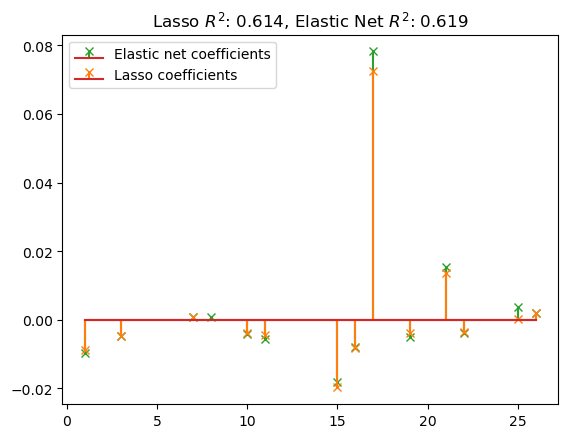

In [38]:
m, s, _ = plt.stem(
    np.where(enet.coef_)[0],
    enet.coef_[enet.coef_ != 0],
    markerfmt="x",
    label="Elastic net coefficients",
    use_line_collection=True,
)
plt.setp([m, s], color="#2ca02c")
m, s, _ = plt.stem(
    np.where(lasso.coef_)[0],
    lasso.coef_[lasso.coef_ != 0],
    markerfmt="x",
    label="Lasso coefficients",
    use_line_collection=True,
)
plt.setp([m, s], color="#ff7f0e")

#True Coefficients
'''
plt.stem(
    np.where(coef)[0],
    coef[coef != 0],
    label="true coefficients",
    markerfmt="bx",
    use_line_collection=True,
)
'''
plt.legend(loc="best")
plt.title(
    "Lasso $R^2$: %.3f, Elastic Net $R^2$: %.3f" % (r2_score_lasso, r2_score_enet)
)
plt.show()

## Regression Tree

## Random Forest
Article on multicolinearity elimination with random forests
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

## XGBoost